In [128]:
import sys
import cv2
sys.path.append("./yolov5/")

import matplotlib.pyplot as plt

%matplotlib inline

from pathlib import Path
from tqdm import tqdm
import shutil

In [117]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def save_image(path, img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path, img)

In [123]:
def crop_image(model, image, verbose=False):
    try:
        img = load_image(image)
    except:
        return None, None
    if img is None:
        return None, None
    
    pred = model(img)
    if len(pred.xyxy) > 0:
    
        xyxy = pred.xyxy[0].cpu().numpy()
        
        body = xyxy[xyxy[:, 5] == 1, :4].astype(int)
        
        if len(body) > 0:
            body = [body[:, 0].min(), body[:, 1].min(), body[:, 2].max(), body[:, 3].max()]
            body_crop = img[body[1]: body[3], body[0]:body[2], :]
        else:
            body_crop = img

        head = xyxy[xyxy[:, 5] == 0, :4].astype(int)
        
        if len(head) > 0:
            head = [head[:, 0].min(), head[:, 1].min(), head[:, 2].max(), head[:, 3].max()]
            head_crop = img[head[1]: head[3], head[0]:head[2], :]
        else:
            head_crop = img

        if verbose:
            f, axes = plt.subplots(1, 3, figsize=(18, 6))
            axes[0].imshow(img)
            axes[1].imshow(body_crop)
            axes[2].imshow(head_crop)
        else:
            return body_crop, head_crop
    else:
        if verbose:
            f, axes = plt.subplots(1, 3, figsize=(18, 6))
            axes[0].imshow(img)
            axes[1].imshow(img)
            axes[2].imshow(img)
        else:
            return img, img

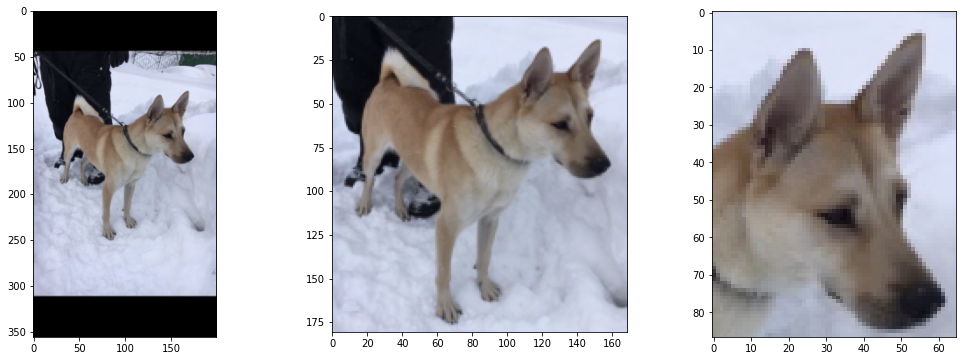

In [124]:
crop_image(model, "/data/hse/data/data_25/rf100199/153776.png", True)

# Train Data

In [126]:
source_path = Path("/data/hse/data/data_25/")
body_path = Path("/data/hse/data_crop_body/data_25")
head_path = Path("/data/hse/data_crop_head/data_25")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)

88573it [22:05, 66.85it/s]


# Dev Data

In [127]:
source_path = Path("/data/hse/data/dev/found/found/")
body_path = Path("/data/hse/data_crop_body/dev/found/found")
head_path = Path("/data/hse/data_crop_head/dev/found/found")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

7546it [01:54, 65.82it/s]


In [132]:
source_path = Path("/data/hse/data/dev/found/synthetic_lost/")
body_path = Path("/data/hse/data_crop_body/dev/found/synthetic_lost")
head_path = Path("/data/hse/data_crop_head/dev/found/synthetic_lost")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

8019it [02:03, 64.72it/s]
5671it [00:01, 3921.83it/s]


In [133]:
source_path = Path("/data/hse/data/dev/lost/lost/")
body_path = Path("/data/hse/data_crop_body/dev/lost/lost/")
head_path = Path("/data/hse/data_crop_head/dev/lost/lost/")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

8379it [02:20, 59.53it/s]
6108it [00:01, 3979.78it/s]


In [134]:
source_path = Path("/data/hse/data/dev/lost/synthetic_found/")
body_path = Path("/data/hse/data_crop_body/dev/lost/synthetic_found/")
head_path = Path("/data/hse/data_crop_head/dev/lost/synthetic_found/")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

7911it [02:04, 63.33it/s]
5532it [00:01, 3357.68it/s]


# Test Data

In [135]:
source_path = Path("/data/hse/data/test/found/found/")
body_path = Path("/data/hse/data_crop_body/test/found/found")
head_path = Path("/data/hse/data_crop_head/test/found/found")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

7589it [01:51, 68.01it/s]
5172it [00:00, 8382.34it/s]


In [136]:
source_path = Path("/data/hse/data/test/found/synthetic_lost/")
body_path = Path("/data/hse/data_crop_body/test/found/synthetic_lost")
head_path = Path("/data/hse/data_crop_head/test/found/synthetic_lost")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

7927it [02:05, 63.37it/s]
5602it [00:00, 6504.65it/s]


In [137]:
source_path = Path("/data/hse/data/test/lost/lost/")
body_path = Path("/data/hse/data_crop_body/test/lost/lost/")
head_path = Path("/data/hse/data_crop_head/test/lost/lost/")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

8288it [02:14, 61.62it/s]
6052it [00:00, 7218.81it/s]


In [138]:
source_path = Path("/data/hse/data/test/lost/synthetic_found/")
body_path = Path("/data/hse/data_crop_body/test/lost/synthetic_found/")
head_path = Path("/data/hse/data_crop_head/test/lost/synthetic_found/")

for img in tqdm(source_path.glob("*/*.*g")):
    body, head = crop_image(model, str(img), False)
    
    if body is None:
        continue
    
    body_save_folder = body_path / img.parent.name
    body_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(body_save_folder / img.name, body)
    
    head_save_folder = head_path / img.parent.name
    head_save_folder.mkdir(exist_ok=True, parents=True)
    save_image(head_save_folder / img.name, head)
    
for source_file in tqdm(source_path.glob("*/*.json")):
    target_file = body_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)
    
    target_file = head_path / source_file.parent.name / source_file.name
    shutil.copy(source_file, target_file)

7890it [02:06, 62.60it/s]
5622it [00:00, 8403.45it/s]
